In [38]:
import pandas as pd
# ランダムフォレストで予測モデルを作成
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [39]:
df = pd.read_csv('clean_result_data.csv')

In [40]:
# データとラベルに分割
data = df.iloc[:,0:len(df.columns)-1]
label = df.iloc[:,len(df.columns)-1:]

In [41]:
# 不要な文字を削除
data['money'] = data['money'].str.strip('"')
data['money'] = data['money'].str.replace(",", "")
# result_rank、は結果なので予測時では使用しない
data.drop(labels=["result_rank", "money"], axis=1, inplace=True)
data.head()

,distance,frame_number,horse_number,age,loaf_weight,time,up,tansyo,popular,weight,...,weather_light_snow,weather_sunny,weather_cloudy,weather_rain,ground_dirt,ground_grass,ground_status_bad,ground_status_slightly_heavy,ground_status_good,ground_status_heavy
0,1600,5,6,3,56.0,96.1,34.3,41.0,10.0,492,...,0,1,0,0,0,1,0,0,1,0
1,1200,5,9,4,57.0,72.4,36.9,4.8,2.0,476,...,0,1,0,0,1,0,0,1,0,0
2,1200,5,10,4,55.0,72.4,36.6,53.2,9.0,484,...,0,1,0,0,1,0,0,1,0,0
3,1200,2,3,5,57.0,72.7,36.9,24.3,7.0,474,...,0,1,0,0,1,0,0,1,0,0
4,1200,7,14,4,57.0,72.8,37.2,23.1,6.0,534,...,0,1,0,0,1,0,0,1,0,0


In [18]:
label.head(15)

,place_top_three
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [19]:
data.columns

Index(['distance', 'frame_number', 'horse_number', 'age', 'loaf_weight',
       'time', 'up', 'tansyo', 'popular', 'weight', 'male', 'female',
       'gelding', 'weather_light_rain', 'weather_light_snow', 'weather_sunny',
       'weather_cloudy', 'weather_rain', 'ground_dirt', 'ground_grass',
       'ground_status_bad', 'ground_status_slightly_heavy',
       'ground_status_good', 'ground_status_heavy'],
      dtype='object')

In [20]:
# 訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=0)

In [42]:
# 予測モデル作成
forest = RandomForestClassifier(n_estimators=100, random_state=0)
#forest.fit(X_train, y_train)

In [25]:
print("訓練結果: {:.3f}".format(forest.score(X_train, y_train)))
print("テスト結果: {:.3f}".format(forest.score(X_test, y_test)))

訓練結果: 1.000
テスト結果: 0.944


In [26]:
# 特徴量の重要度を見る
print("特徴量の重要度　:\n{}".format(forest.feature_importances_))

特徴量の重要度　:
[2.98603479e-02 4.67182631e-02 6.31425824e-02 3.85468860e-02
 3.71126673e-02 1.08655084e-01 1.33217780e-01 2.31229885e-01
 1.24761148e-01 9.15358084e-02 7.79191670e-03 6.98618685e-03
 3.13588931e-03 3.07023478e-03 1.91308760e-04 1.16967223e-02
 1.11383878e-02 4.77019978e-03 6.22158074e-03 6.70137137e-03
 3.81558198e-03 1.07682288e-02 1.15225314e-02 7.40940735e-03]


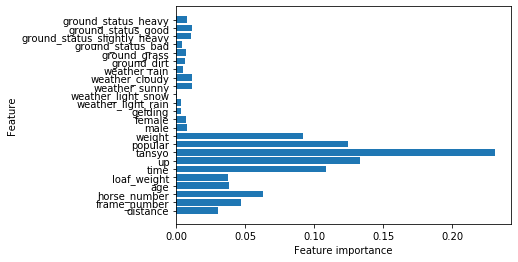

In [27]:
# 特徴量の重要度を可視化
def plot_feature_importances(model):
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(forest)

In [30]:
pre = forest.predict(X_test)

In [35]:
as_score = metrics.accuracy_score(y_test, pre)
print("正答率:", as_score)
as_score = metrics.precision_score(y_test, pre)
print("精度:", as_score)

正答率: 0.9441354745985128
精度: 0.9193341869398207


In [45]:
##########################
# 交差検証を行う #
# 分割数を5に設定
scores = cross_val_score(forest, data, label, cv=5)
print("cross_val_score: {}".format(scores))
print("Average cross_val_score: {:.2f}".format(scores.mean()))

C:\Users\hiros\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hiros\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hiros\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hiros\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

cross_val_score: [0.82441615 0.82972741 0.83019605 0.83127636 0.82751348]
Average cross_val_score: 0.83
